In [69]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
features = pd.read_csv('features.csv')


## create table of genres

list_of_genres = ['action&adventure','animation', 'anime&manga', 'arthouse&international', 'classics', 'comedy', 'cultmovies',
             'documentary','drama', 'faith&spirituality', 'gay&lesbian', 'horror', 'kids&family', 'musical&performingarts',
             'mystery&suspense','romance', 'sciencefiction&fantasy', 'specialinterest',
             'sports&fitness', 'television','western']

num_fresh = []
num_movies = []
for genre in list_of_genres:
  num_movies.append(len(features[features[genre] == 1]))
  num_fresh.append(len(features[(features[genre] == 1) & (filtered_df['tomatometer_status'] == 1)]))

data = {'genre': list_of_genres, 'total_movies': num_movies,'fresh': num_fresh}
genres_df = pd.DataFrame(data = data)

genres_df['perc_fresh'] = 100* genres_df['fresh']/genres_df['total_movies']
genres_df = genres_df.sort_values('perc_fresh',ascending = False).reset_index(drop= True)

genres_df

,genre,total_movies,fresh,perc_fresh
0,documentary,625,577,92.320000
1,specialinterest,390,341,87.435897
2,television,55,45,81.818182
3,sports&fitness,64,51,79.687500
4,arthouse&international,853,659,77.256741
5,musical&performingarts,294,203,69.047619
6,gay&lesbian,15,10,66.666667
7,anime&manga,6,4,66.666667
8,animation,293,181,61.774744
9,drama,3705,2155,58.164642


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

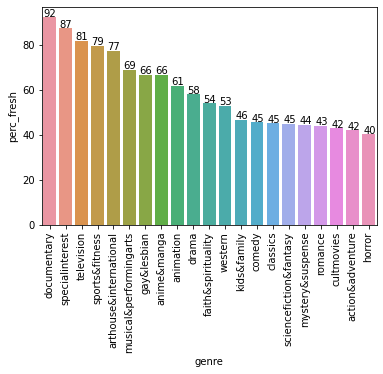

In [72]:
#graph for genres
ax = sns.barplot(data=genres_df, x = 'genre', y="perc_fresh")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xticks(rotation=90)

In [73]:
#logic to rename outliers [ie movies less than 1 hr or greater than 3 hrs]
i = 0
while i < len(length): 
  if length[i] > 18.0:
    length[i] = 18
  elif length[i] < 6.0: 
    length[i] = 6
  i = i +1

In [74]:
length.value_counts()

10.0    1885
9.0     1417
11.0    1127
12.0     862
8.0      462
13.0     357
14.0     194
15.0      76
16.0      43
7.0       33
18.0      24
17.0      17
6.0       13
Name: runtime, dtype: int64

In [75]:
features['mod'] = length
rt_num_movies = []
rt_fresh_movies = []
for runtime in np.arange(6,19):
  rt_num_movies.append(len(filtered_df[features['mod'] == runtime]))
  rt_fresh_movies.append(len(filtered_df[(features['mod'] == runtime) & (features['tomatometer_status'] == 1)]))

In [76]:
#code for runtimes table

runtimes = ['<6','7','8','9','10','11','12','13','14','15','16','17','18+']

data = {'runtime // 10': runtimes,
        'total_movies': rt_num_movies,'fresh': rt_fresh_movies
        }
genres_df = pd.DataFrame(data = data)

genres_df['perc_fresh'] = 100* genres_df['fresh']/genres_df['total_movies']

genres_df

,runtime // 10,total_movies,fresh,perc_fresh
0,<6,13,12,92.307692
1,7,33,28,84.848485
2,8,462,289,62.554113
3,9,1417,686,48.412138
4,10,1885,968,51.352785
5,11,1127,576,51.109139
6,12,862,509,59.048724
7,13,357,221,61.904762
8,14,194,131,67.525773
9,15,76,56,73.684211


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

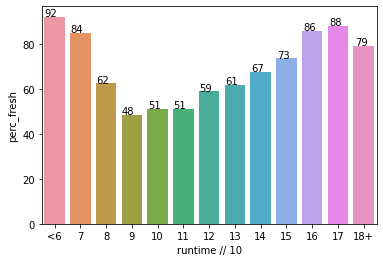

In [77]:
#code for runtime graph

ax = sns.barplot(data=genres_df, x = 'runtime // 10', y="perc_fresh")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xticks(rotation=0)